<br />
<div id="toc_container">
<p class="toc_title">Tabla de contenido</p>
<ul class="toc_list">
	<li><a href="#1-bullet">1. Entendimiento del negocio</a></li>
	<li><a href="#2-bullet">2. Preparación de los datos</a>
		<ul>
			<li><a href="#2.1-bullet">2.1. Importaciones</a></li>
			<li><a href="#2.2-bullet">2.2. Cargar los datos</a></li>
			<li><a href="#2.3-bullet">2.3. Tratamiento de los datos</a>
				<ul>
					<li><a href="#2.3.1-bullet">2.3.1. Chequear valores faltantes</a></li>
					<li><a href="#2.3.2-bullet">2.3.2. Eliminar faltantes</a></li>
					<li><a href="#2.3.3-bullet">2.3.3. Imputar faltantes</a></li>
				</ul>
			</li>
			<li><a href="#2.4-bullet">2.4. Visualización de los datos</a></li>
			<li><a href="#2.5-bullet">2.5. Feature Engineering (Ingeniería de Características)</a></li>
		</ul>
	</li>
	<li><a href="#3-bullet">3. Modelado</a>
		<ul>
			<li><a href="#3.1-bullet">3.1. Preparación del modelado</a></li>
			<li><a href="#3.2-bullet">3.2. Entrenamiento de los modelos</a>
				<ul>
					<li><a href="#3.2.1-bullet">3.2.1. SVC</a></li>
					<li><a href="#3.2.2-bullet">3.2.2. Linear SVC</a></li>
					<li><a href="#3.2.3-bullet">3.2.3. Random Forest</a></li>
					<li><a href="#3.2.4-bullet">3.2.4. Logistic Regression</a></li>
					<li><a href="#3.2.5-bullet">3.2.5. KNeighbors</a></li>
					<li><a href="#3.2.6-bullet">3.2.6. GaussianNB</a></li>
					<li><a href="#3.2.7-bullet">3.2.7. DecisionTree</a></li>
				</ul>
			</li>
			<li><a href="#3.3-bullet">3.3. Comparación de modelos</a></li>
		</ul>
	</li>
	<li><a href="#4-bullet">4. Evaluación</a></li>
</ul>
</div>

## Entendimiento del negocio <a class="anchor" id="1-bullet"></a>
---

> El RMS Titanic fue un transatlántico británico, el mayor barco del mundo al finalizar su construcción, que se hundió en la noche del 14 a la madrugada del 15 de abril de 1912 durante su viaje inaugural desde Southampton a Nueva York. En el hundimiento del Titanic murieron 1514 personas de las 2223 que iban a bordo, lo que convierte a esta tragedia en uno de los mayores naufragios de la historia ocurridos en tiempo de paz. Construido entre 1909 y 1912 en el astillero Harland and Wolff de Belfast, el Titanic era el segundo de los tres transatlánticos que formaban la clase Olympic, propiedad de la naviera White Star Line, junto al RMS Olympic y, posteriormente, el HMHS Britannic. (Wikipedia español)

<div style="text-align:center"><img src="https://upload.wikimedia.org/wikipedia/commons/f/fd/RMS_Titanic_3.jpg" alt="drawing" width="100%" height="100%"/></div><br/>

El dataset del Titanic es uno de los problemas más conocidos dentro del mundo de Data Science. 

Usualmente se tienen varios datos de los integrantes del Titanic, y el objetivo es obtener un modelo que pueda predecir si dado un nuevo integrante (real o ficticio), sobrevive (o sobrevivirá) al desastre.

## Preparación de los datos <a class="anchor" id="2-bullet"></a>
---

### Importaciones <a class="anchor" id="2.1-bullet"></a>

Numpy y Pandas son útiles para manipular los datos y Seaborn es útil para visualizar los datos.

In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings('ignore')

### Cargar los datos <a class="anchor" id="2.2-bullet"></a>

Para cargar los datos utilizamos Pandas, el cual carga los datos en una estructura de datos llamada **Dataframe**.

In [2]:
# Datos de entrenamiento.
training = pd.read_csv("../../post-datasets/titanic_raw_train.csv")

# Datos para testing.
testing = pd.read_csv("../../post-datasets/titanic_raw_test.csv")

Utilizando ```pd.dataframe.head()``` podemos ver las primeras filas de los dataframes.

In [13]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Para obtener las estadísticas, se puede realizar fácilmente con la opción de ```pd.dataframe.describe()```.

In [14]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Podemos mostrar los nombres de las columnas también utilizando ```pd.dataframe.keys()```.

In [15]:
training.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Tratamiento de los datos <a class="anchor" id="2.3-bullet"></a>

#### Chequear valores faltantes <a class="anchor" id="2.3.1-bullet"></a>

Para chequear los valores faltantes utilizamos isnull de pandas (```pd.isnull```)

In [16]:
pd.isnull(training).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Eliminar faltantes <a class="anchor" id="2.3.2-bullet"></a>

En este caso podemos ver que hay muchos atributos faltantes en *edad* y *cabina*.
En este contexto:
* Edad es muy importante y no lo podemos eliminar.
* Cabina si la podemos eliminar, ya que no aporta información relevante sobre el problema.
* Tampoco lo aporta ticket, así que lo eliminamos también.

In [17]:
training.drop(columns=["Cabin", "Ticket"], inplace=True)
testing.drop(columns=["Cabin", "Ticket"], inplace=True)

pd.isnull(training).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

#### Imputar faltantes <a class="anchor" id="2.3.3-bullet"></a>

Como la edad es muy importante para eliminar, tenemos que decidir por qué valor sustituir. Para eso graficamos para saber la distribución que siguen los datos sin dichos atributos faltantes. Lo podemos hacer con el comando ```pd.dataframe.dropna(inplace = True)```. Antes realizamos una copia del conjunto, ya que al utilizar ```inplace = True``` le estamos diciendo a pandas que aplique el cambio al conjunto actual y no a una copia del mismo.

Para graficar utilizamos seaborn con el comando ```sns.displot(dataframe["Atributo"])```.

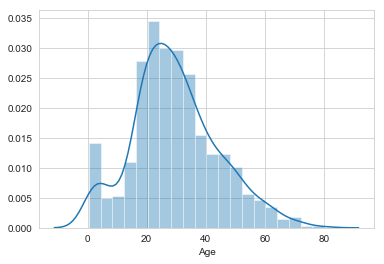

In [18]:
# Copiamos el dataframe para eliminar los faltantes.
copy = training.copy()
# Elimino los faltantes.
copy.dropna(inplace=True)
# Grafico.
sns.distplot(copy["Age"])

Como podemos ver, los datos tienen una distribución cuasi-normal, por lo tanto, podemos sustituir los faltantes por la media. Para sustituir los faltantes, podemos utilizar el comando ```pd.dataframe["Atributo"].fillna(valor_a_sustituir)```.

In [19]:
training["Age"].fillna(training["Age"].median(), inplace = True)
testing["Age"].fillna(testing["Age"].median(), inplace = True) 

training["Embarked"].fillna("S", inplace = True)
testing["Fare"].fillna(testing["Fare"].median(), inplace = True)

### Visualización de los datos <a class="anchor" id="2.4-bullet"></a>

Para visualizar relaciones, utilizamos graficas específicas para cada caso. Por ejemplo, podemos graficar la edad
en función de la variable objetivo para ver si existe alguna relación.

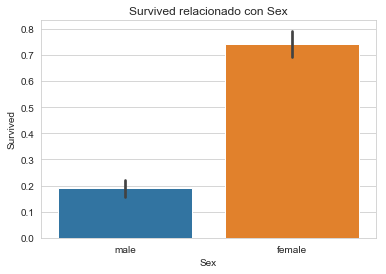

El total de personas que sobrevivieron es: 342
Mujeres:
0.6812865497076024
Hombres:
0.31871345029239767


In [20]:
# Grafica de barras.
sns.barplot(x="Sex", y="Survived", data=training)

plt.title("Survived relacionado con Sex")
plt.show()

total_survived_females = training[training.Sex == "female"]["Survived"].sum()
total_survived_males = training[training.Sex == "male"]["Survived"].sum()

print("El total de personas que sobrevivieron es: " + str((total_survived_females + total_survived_males)))
print("Mujeres:") 
print(total_survived_females/(total_survived_females + total_survived_males))
print("Hombres:")
print(total_survived_males/(total_survived_females + total_survived_males))

Podemos ver que el sexo es un atributo importante para la predicción.

Ahora chequearemos si la clase también es importante.

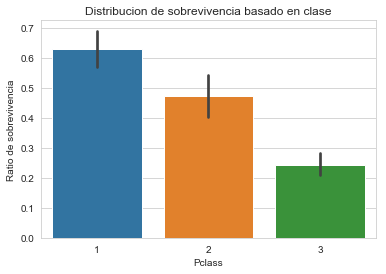

Cantidad de personas que sobrevivieron: 342
Proporción de sobrevivencia de clase 1:
0.39766081871345027
Proporción de sobrevivencia de clase 2:
0.2543859649122807
Proporción de sobrevivencia de clase 3:
0.347953216374269


In [21]:
# Grafica en barras.
sns.barplot(x="Pclass", y="Survived", data=training)
plt.ylabel("Ratio de sobrevivencia")
plt.title("Distribución de sobrevivencia basado en clase")
plt.show()

total_survived_one = training[training.Pclass == 1]["Survived"].sum()
total_survived_two = training[training.Pclass == 2]["Survived"].sum()
total_survived_three = training[training.Pclass == 3]["Survived"].sum()
total_survived_class = total_survived_one + total_survived_two + total_survived_three

print("Cantidad de personas que sobrevivieron: " + str(total_survived_class))
print("Proporción de sobrevivencia de clase 1:") 
print(total_survived_one/total_survived_class)
print("Proporción de sobrevivencia de clase 2:")
print(total_survived_two/total_survived_class)
print("Proporción de sobrevivencia de clase 3:")
print(total_survived_three/total_survived_class)

Si relacionamos ambos atributos.

Text(0.5,1,'Ratios de sobrevivencia basados en sexo y clase')

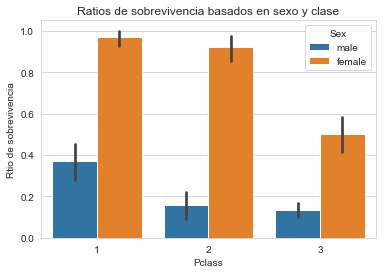

In [22]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=training)
plt.ylabel("Ratio de sobrevivencia")
plt.title("Ratios de sobrevivencia basados en sexo y clase")

En este caso al revés.

Text(0.5,1,'Ratios de sobrevivencia basados en sexo y clase')

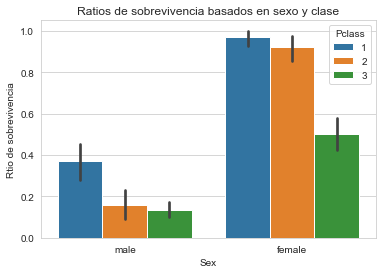

In [23]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=training)
plt.ylabel("Ratio de sobrevivencia")
plt.title("Ratios de sobrevivencia basados en sexo y clase")

En los ejemplos podemos ver que tanto el sexo como la clase son importantes. Si eras de clase 1, tenias mas probabilidad de 
salvarte que si fueras de alguna otra clase.

Podemos realizar el mismo análisis sobre el atributo "Age":

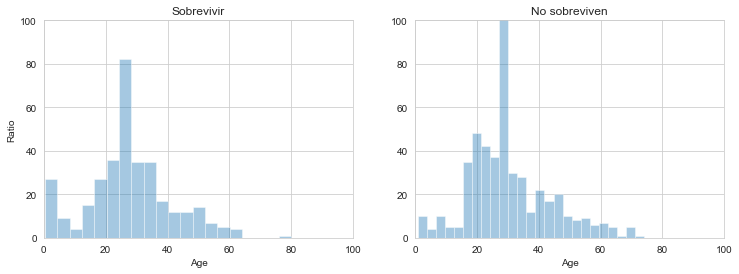

In [24]:
# Edades que sobrevivieron.
survived_ages = training[training.Survived == 1]["Age"]
# Edades que no sobrevivieron.
not_survived_ages = training[training.Survived == 0]["Age"]

plt.subplot(1, 2, 1)

sns.distplot(survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Sobrevivir")
plt.ylabel("Ratio")

plt.subplot(1, 2, 2)
sns.distplot(not_survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("No sobreviven")

plt.subplots_adjust(right=1.7)
plt.show()

Podemos utilizar un *"stripplot"* para ver la distribución de los datos. Por ejemplo, para ver la distribución de los que sobrevivieron con respecto a la edad ejecutamos lo siguiente:

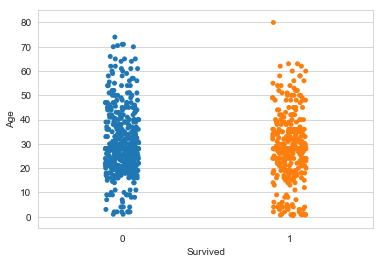

In [25]:
sns.stripplot(x="Survived", y="Age", data=training, jitter=True)

Podemos ver que los pasajeros jóvenes tenían más posibilidades de salvarse.

Podemos ver todos los gráficos juntos con el siguiente comando: ```sns.pairplot```

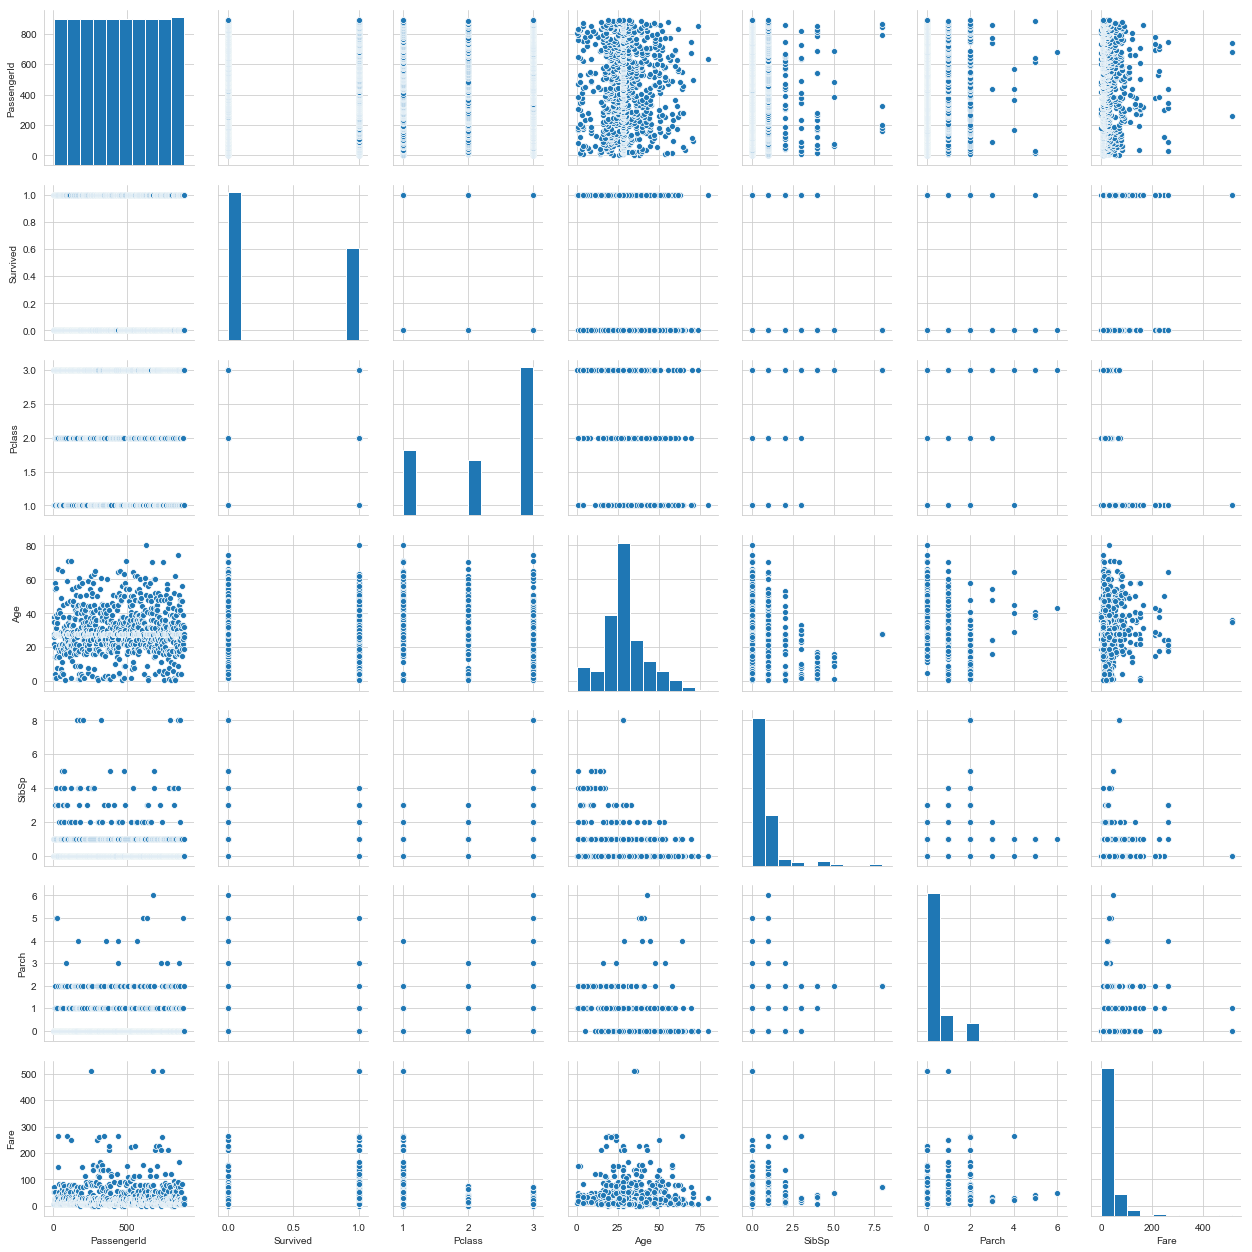

In [26]:
sns.pairplot(training)

### Feature Engineering (Ingeniería de Características)  <a class="anchor" id="2.5-bullet"></a>

Como sexo y embarcación son atributos categóricos, los tenemos que pasar a números. Para esto utilizamos **"one-hot-encoding"**.

Podemos muestrear ejemplos con el comando ```pd.dataframe.sample(N)```, donde ```N``` es el número de ejemplos a muestrear.

In [27]:
training.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
475,476,0,1,"Clifford, Mr. George Quincy",male,28.0,0,0,52.0000,S
229,230,0,3,"Lefebre, Miss. Mathilde",female,28.0,3,1,25.4667,S
158,159,0,3,"Smiljanic, Mr. Mile",male,28.0,0,0,8.6625,S
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,28.0,0,1,55.0000,S
223,224,0,3,"Nenkoff, Mr. Christo",male,28.0,0,0,7.8958,S


Primeramente pasamos los atributos categóricos a atributos numéricos ya que muchos modelos no aceptan atributos categóricos (nominales).

Para esto, simplemente le asignamos un valor a cada valor del atributo categórico. Podemos utilizar el comando ```pd.dataframe.loc[]``` que permite acceder a un grupo de filas o columnas (según especifiquemos) y simplemente le asignamos el valor que queremos.

In [28]:
# Convertimos el atributo "Sex".
training.loc[training["Sex"] == "male", "Sex"] = 0
training.loc[training["Sex"] == "female", "Sex"] = 1
# Convertimos el atributo "Embarked".
training.loc[training["Embarked"] == "S", "Embarked"] = 0
training.loc[training["Embarked"] == "C", "Embarked"] = 1
training.loc[training["Embarked"] == "Q", "Embarked"] = 2

# Realizamos lo mismo para el conjunto de test.
testing.loc[testing["Sex"] == "male", "Sex"] = 0
testing.loc[testing["Sex"] == "female", "Sex"] = 1

testing.loc[testing["Embarked"] == "S", "Embarked"] = 0
testing.loc[testing["Embarked"] == "C", "Embarked"] = 1
testing.loc[testing["Embarked"] == "Q", "Embarked"] = 2

# Muestreamos 5 instancias para ver como quedaron los atributos.
training.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
842,843,1,1,"Serepeca, Miss. Augusta",1,30.0,0,0,31.000,1
743,744,0,3,"McNamee, Mr. Neal",0,24.0,1,0,16.100,0
511,512,0,3,"Webber, Mr. James",0,28.0,0,0,8.050,0
528,529,0,3,"Salonen, Mr. Johan Werner",0,39.0,0,0,7.925,0
129,130,0,3,"Ekstrom, Mr. Johan",0,45.0,0,0,6.975,0


También podemos combinar el atributo ***SibSp*** y ***Parch***, para saber cuán grande es la familia.

In [29]:
# Sumamos 1 porque es la persona + hermanos + padres.
training["FamSize"] = training["SibSp"] + training["Parch"] + 1
testing["FamSize"] = testing["SibSp"] + testing["Parch"] + 1

Otro atributo interesante, es saber si se estaba solo o no. Para esto utilizamos ```pd.dataframe.apply```, que aplica un valor a los atributos. También aprovechamos la característica de Python con la utilización de funciones lambdas.

In [30]:
# Creamos una nueva columna "IsAlone" y le asignamos el valor si el tamaño de la familia es 1.
training["IsAlone"] = training.FamSize.apply(lambda x: 1 if x == 1 else 0)
testing["IsAlone"] = testing.FamSize.apply(lambda x: 1 if x == 1 else 0)

Una característica que en principio no parece importante es el nombre, pero de este podemos extraer información.  Utilizando los indicadores de la persona podemos deducir su estatus en la sociedad. Por ejemplo: Señor, Señora, Señorita, etc.

In [31]:
# Agrego una columna titulo, el cual contiene el título de la persona.
# Utilizo "Regex" para obtenerlos.
for name in training["Name"]:
    training["Title"] = training["Name"].str.extract("([A-Za-z]+)\.",expand=True)
    
for name in testing["Name"]:
    testing["Title"] = testing["Name"].str.extract("([A-Za-z]+)\.",expand=True)

# Muestro todos los titulos (si los agrego a un conjunto se eliminan los duplicados).
titles = set(training["Title"])

# Imprimo los títulos.
print("||", end=" ")
for i in titles:
    print(i, end="|| ")

|| Capt|| Rev|| Miss|| Mlle|| Mme|| Countess|| Master|| Lady|| Mrs|| Dr|| Major|| Col|| Mr|| Don|| Sir|| Jonkheer|| Ms|| 

Obtengo la frecuencia de aparición de los títulos.

In [32]:
# Primeramente armo una lista con los títulos.
title_list = list(training["Title"])
frequency_titles = []

#  Para cada titulo en titles, cuento su frecuencia en title_list.
for i in titles:
    frequency_titles.append(title_list.count(i))

# Creo una lista con los títulos del conjunto (uno por vez).
titles = list(titles)

# Armo un dataframe para mostrar el titulo y la frecuencia.
title_dataframe = pd.DataFrame({
    "Titles" : titles,
    "Frequency" : frequency_titles
})

# Imprimo el dataframe.
print(title_dataframe)

      Titles  Frequency
0       Capt          1
1        Rev          6
2       Miss        182
3       Mlle          2
4        Mme          1
5   Countess          1
6     Master         40
7       Lady          1
8        Mrs        125
9         Dr          7
10     Major          2
11       Col          2
12        Mr        517
13       Don          1
14       Sir          1
15  Jonkheer          1
16        Ms          1


Agrego la columna a los datos, ya pareadas a números. En sí, no agrego todos los títulos, ya que me interesa el estatus, por lo que los que no me interesan les cambio a *"Other"*.

In [33]:
# Creo los remplazos de los títulos que no me interesan.
title_replacements = {"Mlle": "Other", "Major": "Other", "Col": "Other", "Sir": "Other", "Don": "Other", "Mme": "Other",
          "Jonkheer": "Other", "Lady": "Other", "Capt": "Other", "Countess": "Other", "Ms": "Other", "Dona": "Other"}

# Remplazo los títulos en ambos conjuntos.
training.replace({"Title": title_replacements}, inplace=True)
testing.replace({"Title": title_replacements}, inplace=True)

# Codifico a un valor numérico.
training.loc[training["Title"] == "Miss", "Title"] = 0
training.loc[training["Title"] == "Mr", "Title"] = 1
training.loc[training["Title"] == "Mrs", "Title"] = 2
training.loc[training["Title"] == "Master", "Title"] = 3
training.loc[training["Title"] == "Dr", "Title"] = 4
training.loc[training["Title"] == "Rev", "Title"] = 5
training.loc[training["Title"] == "Other", "Title"] = 6

testing.loc[testing["Title"] == "Miss", "Title"] = 0
testing.loc[testing["Title"] == "Mr", "Title"] = 1
testing.loc[testing["Title"] == "Mrs", "Title"] = 2
testing.loc[testing["Title"] == "Master", "Title"] = 3
testing.loc[testing["Title"] == "Dr", "Title"] = 4
testing.loc[testing["Title"] == "Rev", "Title"] = 5
testing.loc[testing["Title"] == "Other", "Title"] = 6

# Muestreo 5 ejemplos.
training.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
764,765,0,3,"Eklund, Mr. Hans Linus",0,16.0,0,0,7.7750,0,1,1,1
144,145,0,2,"Andrew, Mr. Edgardo Samuel",0,18.0,0,0,11.5000,0,1,1,1
433,434,0,3,"Kallio, Mr. Nikolai Erland",0,17.0,0,0,7.1250,0,1,1,1
627,628,1,1,"Longley, Miss. Gretchen Fiske",1,21.0,0,0,77.9583,0,1,1,0
501,502,0,3,"Canavan, Miss. Mary",1,21.0,0,0,7.7500,2,1,1,0


En el contexto del Titanic, el título era importante, y está relacionado con la clase que pertenecen los pasajeros.

## Modelado <a class="anchor" id="3-bullet"></a>
---

En esta sección probamos varios modelos de machine learning. Utilizamos la librería **sklearn**.

Utilizaremos los siguientes modelos:
* ```sklearn.svm.SVC``` $\Rightarrow$ http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
* ```sklearn.ensemble.RandomForestClassifier``` $\Rightarrow$ http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* ```sklearn.linear_model.LogisticRegression``` $\Rightarrow$ http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* ```sklearn.neighbors.KNeighborsClassifier``` $\Rightarrow$ http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
* ```sklearn.naive_bayes.GaussianNB``` $\Rightarrow$ http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
* ```sklearn.tree.DecisionTreeClasifier``` $\Rightarrow$ http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [34]:
# Modelos a utilizar:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

c:\programdata\anaconda3\envs\ml-porfolio\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Y para chequear la performance de nuestros modelos utilizamos:
* ```sklearn.metrics.make_scorer``` $\Rightarrow$ http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html
* ```sklearn.metrics.accuracy_score``` $\Rightarrow$ http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [35]:
from sklearn.metrics import make_scorer, accuracy_score

Utilizaremos ```sklearn.model_selection.GridSearchCV``` (http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) para la optimización del modelo.

In [36]:
from sklearn.model_selection import GridSearchCV

### Preparación del modelado <a class="anchor" id="3.1-bullet"></a>

Ahora debemos definir los atributos que utilizaremos para entrenar. O sea, que atributos son importantes para el contexto del problema. Por ejemplo, sabemos que el nombre no es importante para el contexto del problema (en sí, no era importante, pero nos sirvió para obtener un mejor atributo ("Title") a partir del nombre). También definimos la variable objetivo.

In [37]:
# Atributos.
features = ["Pclass", "Sex", "Age", "Embarked", "Fare", "FamSize", "IsAlone", "Title"]
# Defino los atributos del conjunto de entrenamiento (filtrando los atributos en "features").
X_train = training[features] 
# Defino la variable objetivo (filtrando solamente "Survived").
y_train = training["Survived"] 
# Hago lo mismo para testing.
X_test = testing[features] 

Creamos un conjunto de validación (a parte del de test). O sea, ahora tenemos 3 conjuntos.

Esto nos sirve para la validación cruzada. Los datos de test se utilizan únicamente para testear el modelo (una vez que está entrenado, simulamos las predicciones con el conjunto "test").

Para realizar la división del conjunto, podemos utilizar ```sklearn.model_selection.train_test_split``` (http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), que retorna 4 conjuntos. 

In [38]:
from sklearn.model_selection import train_test_split

X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

### Entrenamiento de los modelos <a class="anchor" id="3.2-bullet"></a>

En esta sección se entrenan los modelos especificados anteriormente para ver cual es el que realiza la mejor predicción.

#### SVC <a class="anchor" id="3.2.1-bullet"></a>

In [39]:
# Cargamos el modelo.
svc_clf = SVC() 
# Entrenamos el modelo.
svc_clf.fit(X_training, y_training)
# Realizamos las predicciones.
pred_svc = svc_clf.predict(X_valid)
# Calculamos la precisión.
acc_svc = accuracy_score(y_valid, pred_svc)

# Imprimimos la precisión del modelo.
print(acc_svc)

0.7150837988826816


#### Linear SVC <a class="anchor" id="3.2.2-bullet"></a>

In [40]:
# Cargamos el modelo.
linsvc_clf = LinearSVC()
# Entrenamos el modelo.
linsvc_clf.fit(X_training, y_training)
# Realizamos las predicciones.
pred_linsvc = linsvc_clf.predict(X_valid)
# Calculamos la precisión.
acc_linsvc = accuracy_score(y_valid, pred_linsvc)

# Imprimimos la precisión del modelo.
print(acc_linsvc)

0.7821229050279329


#### Random Forest <a class="anchor" id="3.2.3-bullet"></a> 

In [41]:
# Cargamos el modelo.
rf_clf = RandomForestClassifier()
# Entrenamos el modelo.
rf_clf.fit(X_training, y_training)
# Realizamos las predicciones.
pred_rf = rf_clf.predict(X_valid)
# Calculamos la precisión.
acc_rf = accuracy_score(y_valid, pred_rf)

# Imprimimos la precisión del modelo.
print(acc_rf)

0.8212290502793296


#### Logistic Regression <a class="anchor" id="3.2.4-bullet"></a> 

In [42]:
# Cargamos el modelo.
logreg_clf = LogisticRegression()
# Entrenamos el modelo.
logreg_clf.fit(X_training, y_training)
# Realizamos las predicciones.
pred_logreg = logreg_clf.predict(X_valid)
# Calculamos la precisión.
acc_logreg = accuracy_score(y_valid, pred_logreg)

# Imprimimos la precisión del modelo.
print(acc_logreg)

0.8044692737430168


#### KNeighbors <a class="anchor" id="3.2.5-bullet"></a> 

In [43]:
# Cargamos el modelo.
knn_clf = KNeighborsClassifier()
# Entrenamos el modelo.
knn_clf.fit(X_training, y_training)
# Realizamos las predicciones.
pred_knn = knn_clf.predict(X_valid)
# Calculamos la precisión.
acc_knn = accuracy_score(y_valid, pred_knn)

# Imprimimos la precisión del modelo.
print(acc_knn)

0.7430167597765364


#### GaussianNB <a class="anchor" id="3.2.6-bullet"></a>

In [44]:
# Cargamos el modelo.
gnb_clf = GaussianNB()
# Entrenamos el modelo.
gnb_clf.fit(X_training, y_training)
# Realizamos las predicciones.
pred_gnb = gnb_clf.predict(X_valid)
# Calculamos la precisión.
acc_gnb = accuracy_score(y_valid, pred_gnb)

# Imprimimos la precisión del modelo.
print(acc_gnb)

0.7821229050279329


#### DecisionTree <a class="anchor" id="3.2.7-bullet"></a>

In [45]:
# Cargamos el modelo.
dt_clf = DecisionTreeClassifier()
# Entrenamos el modelo.
dt_clf.fit(X_training, y_training)
# Realizamos las predicciones.
pred_dt = dt_clf.predict(X_valid)
# Calculamos la precisión.
acc_dt = accuracy_score(y_valid, pred_dt)

# Imprimimos la precisión del modelo.
print(acc_dt)

0.776536312849162


### Comparación de modelos <a class="anchor" id="3.3-bullet"></a>

Una vez que tenemos las precisiones de los modelos, podemos comparar las performance de los modelos

In [46]:
# Creamos un dataframe para mostrar los datos.
model_performance = pd.DataFrame({
    "Model": ["SVC", "Linear SVC", "Random Forest", 
              "Logistic Regression", "K Nearest Neighbors", "Gaussian Naive Bayes",  
              "Decision Tree"],
    "Accuracy": [acc_svc, acc_linsvc, acc_rf, 
              acc_logreg, acc_knn, acc_gnb, acc_dt]
})

# Ordenamos de mayor a menor.
model_performance.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy
2,Random Forest,0.821229
3,Logistic Regression,0.804469
1,Linear SVC,0.782123
5,Gaussian Naive Bayes,0.782123
6,Decision Tree,0.776536
4,K Nearest Neighbors,0.743017
0,SVC,0.715084


### Mejorar los parámetros del mejor modelo <a class="anchor" id="3.4-bullet"></a>

En los modelos paramétricos (los modelos anteriores) se realizan varias suposiciones en la función a predecir. Por ejemplo, en los modelos lineales se asume que existe una función lineal que logra separar correctamente las instancias, o sea, que los datos siguen una distribución lineal.

En este tipo de modelos, no se trata de aprender la función en sí (o sea, la relación de los datos) sino más bien se trata de aprender cuales son los mejores coeficientes para dichos modelos.

En este sentido, podemos optimizar dichos parámetros para un mejor rendimiento del modelo. Como RandomForestClassifier es el que mejor predicción nos proporciona, lo elegimos a éste para optimizar sus parámetros.

*Nota: También se puede optimizar los parámetros de cada modelo y luego compararlos, sería algo más lógico, pero el costo computacional crece mucho*

Optimizamos el modelo:

In [47]:
# Seleccionamos el modelo nuevamente.
rf_clf = RandomForestClassifier()

# Especificamos los parámetros iniciales.
parameters = {"n_estimators": [4, 5, 6, 7, 8, 9, 10, 15], 
              "criterion": ["gini", "entropy"],
              "max_features": ["auto", "sqrt", "log2"], 
              "max_depth": [2, 3, 5, 10], 
              "min_samples_split": [2, 3, 5, 10]
             }

# Optimizamos el modelo.
grid_cv = GridSearchCV(rf_clf, parameters, scoring=make_scorer(accuracy_score))
grid_cv = grid_cv.fit(X_train, y_train)

# Imprimimos el modelo optimizado.
print("Nuestro modelo optimizado es:")
grid_cv.best_estimator_

Nuestro modelo optimizado es:


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=8, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Luego de optimizar los parámetros, entrenamos el modelo con dichos parámetros:

In [48]:
# Cargamos el modelo con los parámetros optimizados.
rf_clf = grid_cv.best_estimator_
# Entrenamos el modelo.
rf_clf.fit(X_train, y_train)
# Realizamos las predicciones.
pred_rf = rf_clf.predict(X_valid)
# Calculamos la precisión.
acc_rf = accuracy_score(y_valid, pred_rf)

# Imprimimos la precisión el modelo con los parámetros optimizados.
print(acc_rf)

0.9050279329608939


## Evaluación <a class="anchor" id="4-bullet"></a>
---

Una vez finalizado el proceso, podemos ver que el mejor modelo a utilizar es "Random Forest".

Un 10% de error es bastante aceptable para el modelo y para dicho contexto.

El proceso ahora pasa a la etapa de producción, o sea, subir el modelo a la nube y utilizar una api para realizar las consultas.